In [1]:
import pandas as pd
import numpy as np
from numpy import unravel_index
import matplotlib.pyplot as plt

In [2]:
df_titanic = pd.read_csv('titanic.csv')

In [6]:
df_titanic.corr().values


array([[ 1.        , -0.00500666, -0.03514399,  0.0368472 , -0.05752683,
        -0.00165201,  0.01265822],
       [-0.00500666,  1.        , -0.33848104, -0.07722109, -0.0353225 ,
         0.08162941,  0.25730652],
       [-0.03514399, -0.33848104,  1.        , -0.36922602,  0.08308136,
         0.01844267, -0.54949962],
       [ 0.0368472 , -0.07722109, -0.36922602,  1.        , -0.30824676,
        -0.18911926,  0.09606669],
       [-0.05752683, -0.0353225 ,  0.08308136, -0.30824676,  1.        ,
         0.4148377 ,  0.15965104],
       [-0.00165201,  0.08162941,  0.01844267, -0.18911926,  0.4148377 ,
         1.        ,  0.21622494],
       [ 0.01265822,  0.25730652, -0.54949962,  0.09606669,  0.15965104,
         0.21622494,  1.        ]])

In [69]:
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [70]:
# Prepare Data
to_plot = df_titanic.corr()
n_columns = len(to_plot)


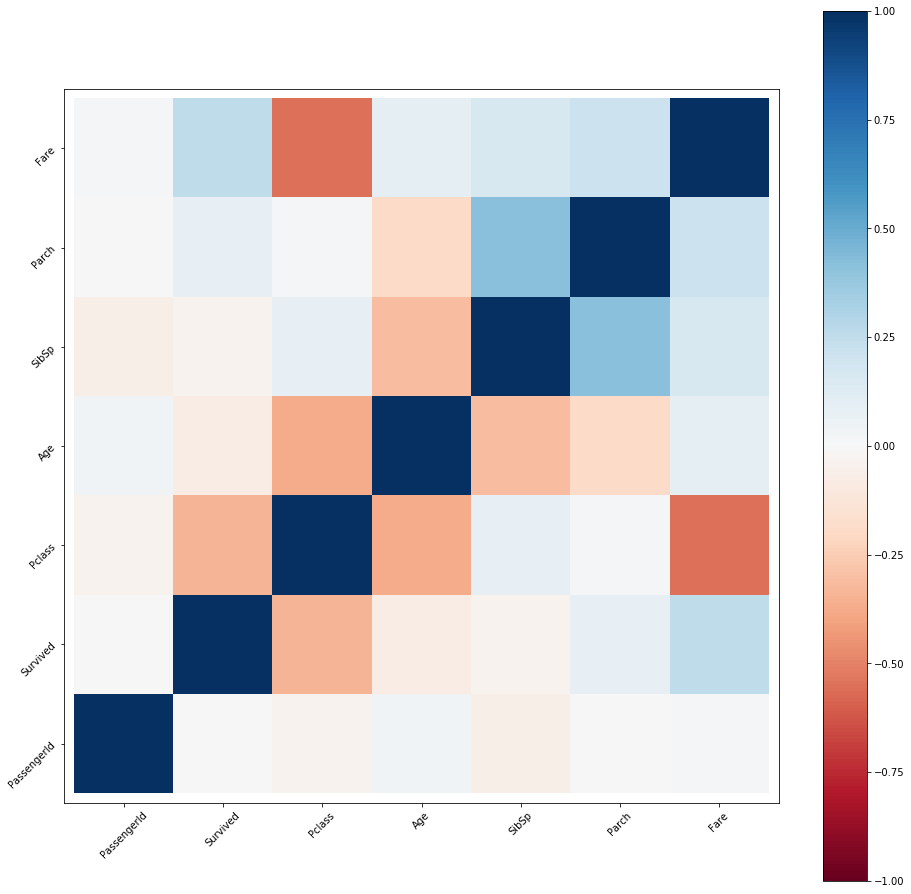

In [71]:
# Create Figure
plt.figure( figsize=(16,16))

# Add Heatmap
plt.imshow( to_plot.values, cmap = 'RdBu' )

# Set Aesthetics
plt.xticks( list(range(n_columns)), to_plot.columns, rotation = 45 )
plt.yticks( list(range(n_columns)), to_plot.columns, rotation = 45 )
plt.xlim(-0.6, n_columns-0.4 )
plt.ylim(-0.6, n_columns-0.4)
plt.clim(-1,1)
plt.colorbar()
plt.show()

تابع زیر دو ویژگی غیریکسان با بیشترین میزان همبستگی را به صورت یک ست برمی‌گرداند.

In [206]:
def max_corr(dataframe):
    to_corr = dataframe.corr()
    length = len(to_corr)
    ith , jth = 0 , 1
    maximum = to_corr.iloc[ith][jth]
    for i in range(length):
        for j in range(length):
            if i != j:
                to_corr.iloc[i][j] = to_corr.iloc[i][j]*-1 if to_corr.iloc[i][j] < 0 else None
                if to_corr.iloc[i][j] > maximum:
                    maximum = to_corr.iloc[i][j]
                    ith , jth = i , j
    output = {to_corr.columns[ith] , to_corr.columns[jth]}
    for i in range(len(output)):
        print(output[i])


In [207]:
max_corr(df_titanic)

TypeError: 'set' object is not subscriptable

پس از ذخیره کردن نوت‌بوک و قرار دادن تابع در `functions.py` ارسال پاسخ را انتخاب کنید.